# Pre-processing and analysis for one-source with distance 15

## Load or create R scripts

In [1]:
get.data <- dget("get_data.r") #script to read data files
get.pars <- dget("get_pars.r") #script to extract relevant parameters from raw data
get.mv.bound <- dget("get_mvbound.r") #script to look at movement of boundary across learning
plot.cirib <- dget("plot_cirib.r")  #script to plot confidence intervals as ribbon plot

In [2]:
zscore <- function(v){(v - mean(v, na.rm=T))/sqrt(var(v, na.rm=T))} #function to compute Z score

## Load data

In [3]:
fnames <- list.files(pattern = "*.csv") #create a vector of data file names, assuming all csv files are data
nfiles <- length(fnames) #number of data files
alldat <- list(get.data(fnames[1])) #initialize list containing all data with first subject
for(i1 in c(2:nfiles)) alldat[[i1]] <- get.data(fnames[i1]) #populate list with rest of data

allpars <- get.pars(alldat) #extract parameters from grid test 1 and 2 from all data

[1] "Processing sj: 1"


Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

[1] "Processing sj: 2"


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

[1] "Processing sj: 3"


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

[1] "Processing sj: 4"


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

[1] "Processing sj: 5"


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

[1] "Processing sj: 6"
[1] "Processing sj: 7"
[1] "Processing sj: 8"


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

[1] "Processing sj: 9"
[1] "Processing sj: 10"


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

[1] "Processing sj: 11"
[1] "Processing sj: 12"
[1] "Processing sj: 13"


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

[1] "Processing sj: 14"
[1] "Processing sj: 15"
[1] "Processing sj: 16"
[1] "Processing sj: 17"
[1] "Processing sj: 18"
[1] "Processing sj: 19"
[1] "Processing sj: 20"
[1] "Processing sj: 21"


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

[1] "Processing sj: 22"


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

[1] "Processing sj: 23"
[1] "Processing sj: 24"
[1] "Processing sj: 25"
[1] "Processing sj: 26"
[1] "Processing sj: 27"
[1] "Processing sj: 28"


Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

[1] "Processing sj: 29"
[1] "Processing sj: 30"
[1] "Processing sj: 31"


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

[1] "Processing sj: 32"
[1] "Processing sj: 33"
[1] "Processing sj: 34"


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

[1] "Processing sj: 35"


NOTE that get pars will produce warnings whenever the subject data has a perfectly strict boundary--these can be safely ignored.

In [75]:
head(allpars)

PID,cond,axlab,closebound,cbside,sno,FaceLeft,t1int,t1slope,t1bound,t2int,t2slope,t2bound,bshift,alshift,Zalshift,t1dist
one15_C_135_13,one15,SP-C,135,left,13,1,8.912747,-0.05566794,160.1056,30.22759,-0.1679310,180.0001,1.989454e+01,-1.989454e+01,-1.2294353,-25.10555
one15_C_135_14,one15,SP-C,135,left,14,2,15.060435,-0.08858359,170.0138,601.98055,-4.1515695,145.0007,-2.501311e+01,2.501311e+01,0.6410029,-35.01383
one15_C_135_24,one15,SP-C,135,left,24,2,290.397895,-2.07427068,140.0000,20.15170,-0.1679310,119.9999,-2.000010e+01,2.000010e+01,0.4322069,-5.00000
one15_C_135_37,one15,SP-C,135,left,37,1,370.142293,-2.05634607,180.0000,370.14229,-2.0563461,180.0000,0.000000e+00,0.000000e+00,-0.4008124,-45.00000
one15_C_135_38,one15,SP-C,135,left,38,2,351.382156,-2.06695386,170.0000,758.49377,-4.1000552,184.9960,1.499599e+01,-1.499599e+01,-1.0254068,-35.00000
one15_C_135_39,one15,SP-C,135,left,39,1,311.533714,-2.07689143,150.0000,18.48242,-0.1232161,150.0000,2.842171e-14,-2.842171e-14,-0.4008124,-15.00000


### KEY

**PID**: Unique ID for participant
**cond**: Experiment condition
**axlab**: What label did the "spiky" fruit get? For counterbalancing, not interesting  
**closebound**:    What was the location of the closest source's boundary? 
**cbside**: Factor indicating side of the range midpoint (left, right) was the close source boundary?
**sno**:       Subject number in condition  
**txint, slope, bound**:  Intercept, slope, and estimated boundary from logistic regression on test 1 and test 2 data. NOTE that only the boundary estimate is used in analysis.  
**bshift**:    Boundary shift direction and magnitude measured as test 2 boundary - test 1 boundary  
**alshift**:  Boundary shift aligned so positive numbers indicate shift toward source pole  
**Zalshift**: Zscored alshift, recalculated below  
**t1dist**: Close source - test 1 boundary

## Check data for outliers

In [76]:
zthresh <- 2.5

First check both boundaries to see if there are any impossible values

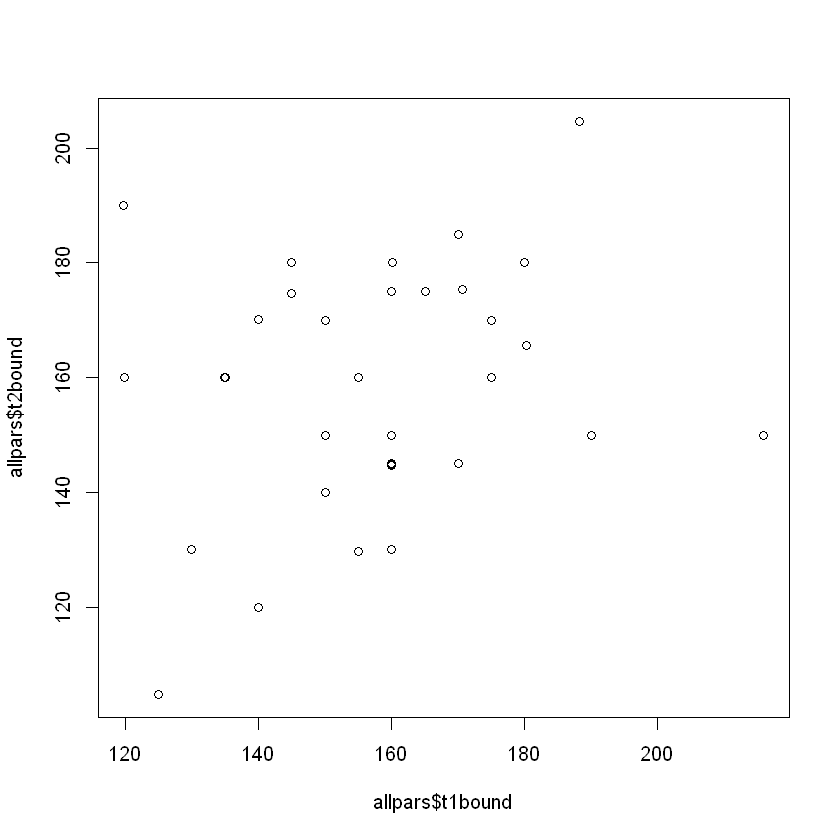

In [77]:
plot(allpars$t1bound, allpars$t2bound)

There are none, so compute aligned shift and save the "no impossible"(nimp) file for the mega-dataset.

In [78]:
allpars$alshift[allpars$closebound==135] <- -1 * allpars$bshift[allpars$closebound==135] #Compute aligned shift (midshift)
write.csv(allpars, "summary/one15_grids_nimp.csv", quote=F, row.names=F)

Now see if there are outliers with abs(z) > zthresh

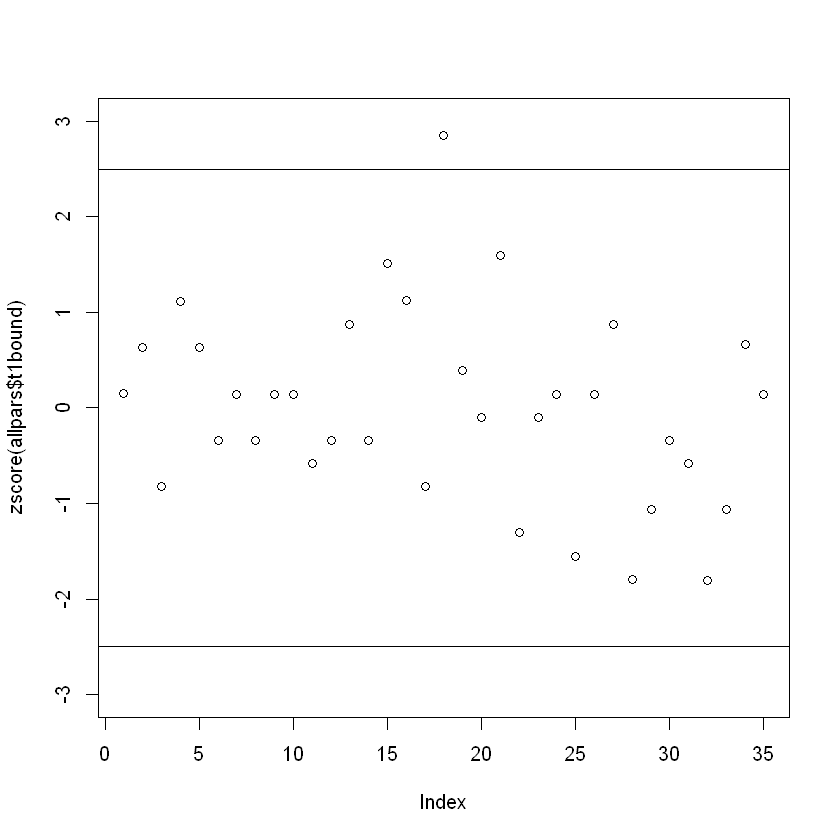

In [79]:
plot(zscore(allpars$t1bound), ylim = c(-3,3))
abline(h=c(-zthresh, zthresh))

Add any outliers to exclude list and remove from noo object

In [80]:
sjex <- as.character(allpars$PID[abs(zscore(allpars$t1bound))>zthresh]) #Add outlier to exclude list
noo <- allpars[is.na(match(allpars$PID, sjex)),]  #Copy non-excluded subjects to noo object
dim(allpars)
dim(noo)

[1] 35 17

[1] 34 17

 Next check the aligned shift distributions to see if there are any outliers

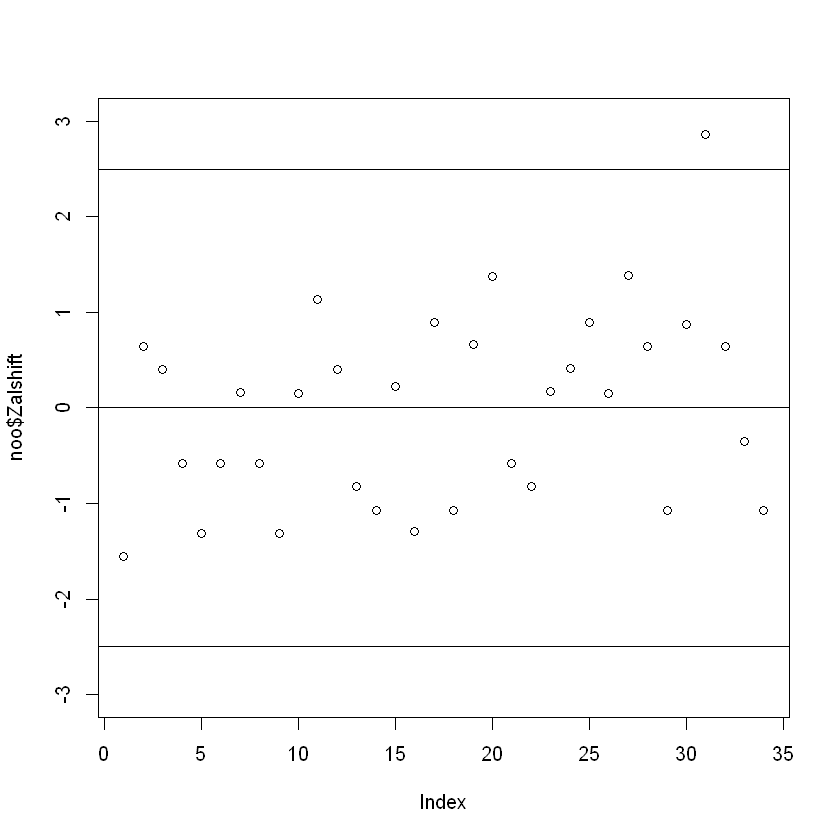

In [81]:
noo$Zalshift <- zscore(noo$alshift)             #Recompute Z scores for this aligned shift
plot(noo$Zalshift, ylim = c(-3,3)); abline(h = c(-zthresh,0,zthresh))       #plot

Add any outliers to exclude list and remove from noo object

In [82]:
sjex <- c(sjex, as.character(noo$PID[abs(noo$Zalshift) > zthresh])) #Add PID of outlying subject to exclusion list
sjex <- unique(sjex)  #Remove any accidental duplicates
noo <- allpars[is.na(match(allpars$PID, sjex)),]        #Copy all subjects not on exclusion list to noo object
dim(noo)

[1] 33 17

## Data analysis

Does the initial (t1) boundary differ between the two groups? It shouldn't since they have the exact same experience to this point.

In [83]:
t.test(t1bound ~ closebound, data = noo)


	Welch Two Sample t-test

data:  t1bound by closebound
t = 0.74528, df = 30.359, p-value = 0.4618
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -7.90604 16.99902
sample estimates:
mean in group 135 mean in group 165 
         158.5384          153.9919 


Reassuringly, it doesn't. So what is the location of the initial boundary on average?

In [84]:
t.test(noo$t1bound)


	One Sample t-test

data:  noo$t1bound
t = 51.769, df = 32, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 150.1829 162.4853
sample estimates:
mean of x 
 156.3341 


The mean boundary is shifted a bit positive relative to the midpoint between labeled items.

Next, looking across all subjects, does the aligned boundary shift differ reliably from zero? Also, what are the confidence limits on the mean shift?

In [85]:
t.test(noo$alshift)


	One Sample t-test

data:  noo$alshift
t = 3.24, df = 32, p-value = 0.002788
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
  3.741784 16.412216
sample estimates:
mean of x 
   10.077 


The boundary shifts reliably toward the close source; mean shift and confidence limits noted above. 

Next, where does the test 2 boundary lie for each group, and does this differ depending on where the source was?

In [86]:
t.test(t2bound ~ closebound, data = noo)


	Welch Two Sample t-test

data:  t2bound by closebound
t = -2.2862, df = 29.385, p-value = 0.02963
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -29.66926  -1.65893
sample estimates:
mean in group 135 mean in group 165 
         149.3668          165.0309 


When the source was at 135, the boundary ends up at 149; when the source is at 165, the boundary ends up at 165.

Is the boundary moving all the way to the source?

In [87]:
t.test(noo$t2bound[noo$closebound==135]) #compute confidence intervals for source at 135 subgroup


	One Sample t-test

data:  noo$t2bound[noo$closebound == 135]
t = 27.395, df = 16, p-value = 7.148e-15
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 137.8082 160.9254
sample estimates:
mean of x 
 149.3668 


In [88]:
t.test(noo$t2bound[noo$closebound==165]) #compute confidence intervals for source at 165 subgroup


	One Sample t-test

data:  noo$t2bound[noo$closebound == 165]
t = 39.774, df = 15, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 156.1871 173.8748
sample estimates:
mean of x 
 165.0309 


In both cases boundaries move toward the source. When the initial boundary is closer to the source (source at 165), the final boundary ends up at the source. When it is farther away (source at 135), the final boundary ends up a little short of the source.

Another way of looking at the movement is to compute, for each subject, how far the source was from the learner's initial boundary, and see if this predicts the amount of shift:

In [89]:
#Predict boundary shift from difference between source and initial boundary

m <- lm(bshift ~ t1dist, data = noo)     #fit linear model predicting shift from distance
summary(m)                  #look at model parameters


Call:
lm(formula = bshift ~ t1dist, data = noo)

Residuals:
    Min      1Q  Median      3Q     Max 
-29.098 -16.413   3.402  13.876  28.255 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3.9586     3.0647   1.292 0.206019    
t1dist        0.4907     0.1220   4.021 0.000344 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 16.95 on 31 degrees of freedom
Multiple R-squared:  0.3428,	Adjusted R-squared:  0.3216 
F-statistic: 16.17 on 1 and 31 DF,  p-value: 0.0003442


Distance predicts shift significantly. The intercept is not reliably different from zero, so that, with zero distance, boundary does not shift. The slope of 0.49 suggests that the boundary shifts about half of the way toward the close source. Let's visualize:

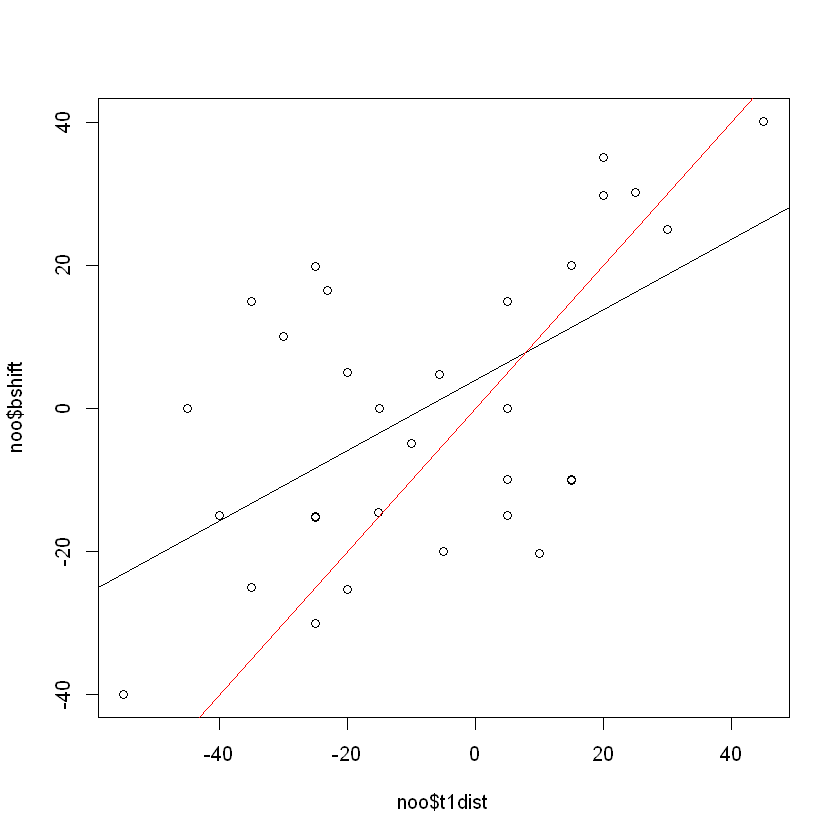

In [90]:
plot(noo$t1dist, noo$bshift) #plot distance of source against boundary shift
abline(lm(bshift~t1dist, data = noo)$coefficients) #add least squares line
abline(0,1, col = 2)   #Add line with slope 1 and intercept 0 

The black line shows the least-squares linear fit; the red line shows the expected slope if learner moved all the way toward the source. True slope is quite a bit shallower. If we compute confidence limits on slope we get:

In [30]:
confint(m, 't1dist', level = 0.95)

,2.5 %,97.5 %
t1dist,0.2418323,0.7395571


So the confidence limit clearly excludes 1. 

### Export parameter data

In [64]:
write.csv(noo, paste("summary/onesrc15_noo_z", zthresh*10, ".csv", sep=""), row.names=F, quote=F)

## Further analyses

### Movement of boundary over the course of learning

In [27]:
nsj <- length(alldat)    #Number of subjects is length of alldat object
mvbnd <- matrix(0, nsj, 301)  #Initialize matrix of 0s to hold boundary-movement data, with 301 windows
for(i1 in c(1:nsj)) mvbnd[i1,] <- get.mv.bound(alldat, sj=i1) #Compute move data for each sj and store in matrix rows


Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted pr

"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numer

"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algo

"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did 

"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitt

"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algo

"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numer

"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numer

"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algo

"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabi

"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numer

"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fi

"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numer

"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algo

"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: al

"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numer

"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algo

"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algo

"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algo

"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algo

"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numer

"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numer

"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numer

"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algo

"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algo

"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numer

"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numer

"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algo

"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algo

Again, ignore warnings here

In [28]:
tmp <- cbind(allpars[,1:6], mvbnd) #Add subject and condition data columns
mvb.noo <- tmp[is.na(match(tmp$PID, sjex)),] #Remove excluded subjects

In [33]:
head(mvb.noo)

PID,cond,axlab,closebound,sno,FaceLeft,1,2,3,4,...,292,293,294,295,296,297,298,299,300,301
one15_C_135_13,one15,SP-C,135,13,1,163.7089,164.2864,164.2495,164.3525,...,185.5005,185.5006,185.4968,185.4995,185.4947,185.4946,185.4968,185.4968,185.4904,185.4852
one15_C_135_14,one15,SP-C,135,14,2,170.6189,174.4290,174.4263,178.7385,...,144.3882,144.3951,144.3966,144.3968,144.3969,144.3963,144.3977,144.3946,144.3900,144.3788
one15_C_135_24,one15,SP-C,135,24,2,140.0000,140.0000,140.0000,140.0000,...,132.5156,132.5156,132.5157,132.5157,132.5157,132.5134,132.5134,132.5134,121.6485,127.9663
one15_C_135_37,one15,SP-C,135,37,1,180.0000,180.0000,180.0000,184.9004,...,152.4808,158.1149,168.5811,168.3523,168.2844,168.8375,168.6183,182.5135,182.5072,182.5073
one15_C_135_38,one15,SP-C,135,38,2,170.0000,170.0000,170.0000,170.0000,...,192.0132,192.0228,192.0143,192.0206,191.9952,191.9962,191.9911,191.9917,191.9919,191.9902
one15_C_135_39,one15,SP-C,135,39,1,150.0000,150.0000,150.0000,150.0000,...,145.9040,145.9040,145.9040,145.9040,145.9040,145.9040,145.9040,145.8899,145.8897,145.8897


In [30]:
tmp <- mvb.noo[,7:307] #Copy movement data into temporary object
tmp[abs(tmp) > 250] <- NA  #Remove boundary estimates that are extreme (outside 50-250 range)
tmp[tmp < 50] <- NA
mvb.noo[,7:307] <- tmp   #Put remaining data back in


In [31]:
tmp <- cbind(allpars[,1:6], mvbnd) #Add subject and condition data columns
mvb.noo <- tmp[is.na(match(tmp$PID, sjex)),] #Remove excluded subjects
tmp <- as.matrix(mvb.noo[,7:307])
for(i1 in c(1:dim(tmp)[2])) tmp[abs(zscore(tmp[,i1])) > 2,i1] <- NA
mvb.noo[,7:307]<-tmp

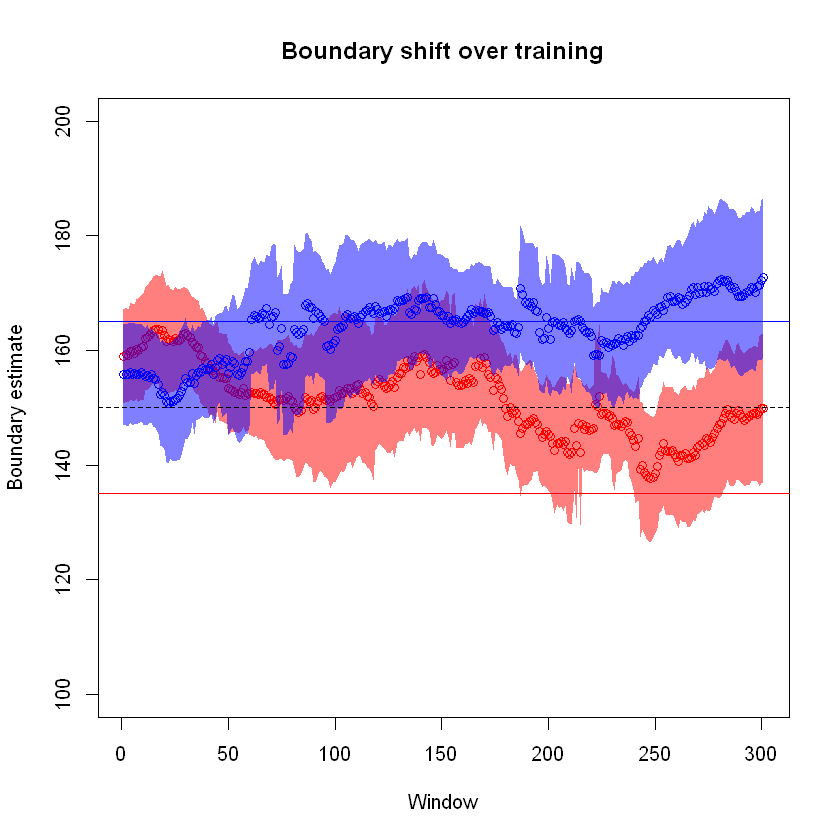

In [34]:
plot.cirib(mvb.noo[mvb.noo$closebound==135,7:307], genplot=T)
plot.cirib(mvb.noo[mvb.noo$closebound==165,7:307], genplot=F, color=4)
abline(h=150, lty=2)
abline(h=165, col=4)
abline(h=135, col=2)
title("Boundary shift over training")